<a href="https://colab.research.google.com/github/SatishKV/UCBAIProgram/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('/content/drive/My Drive/UCBerkeley/Module5/data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# getting details about the total number of rows and columns
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [6]:
# Column details including data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# validate for null values in the columns
data.isna().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
# data cleaning - removing the car column since it has all null values
data = data.drop(['car'], axis=1)


In [9]:
# mapping non-numeric data to numeric. This will help to understand the correlation between various columns
convertpassanger = {
  r'Alone.*': '1',
  r'Friend.*': '2',
  r'Partner.*': '3',
  r'Kid.*': '4',
 }
converteducation = {
  r'Some.*': '1',
  r'High.*': '2',
  r'Associates degree.*': '3',
  r'Bachelors.*' : '4',
  r'Graduate.*': '5',
 }

convertoccupation = {
  r'Unemployed.*': '1',
  r'Student.*': '2',
  r'Computer.*': '3',
  r'Sales.*': '4',
  r'Education.*' : '5',
  r'Management.*': '6',
  r'Office.*': '7',
  r'Arts.*': '8',
  r'Business.*': '9',
  r'Retired.*' : '10',
  r'Food.*': '11',
  r'Healthcare Practitioners.*': '12',
  r'Healthcare Support.*': '13',
  r'Community.*': '14',
  r'Legal.*' : '15',
  r'Transportation.*': '16',
  r'Architecture.*': '17',
  r'Personal.*': '18',
  r'Protective.*': '19',
  r'Life.*' : '20',
  r'Construction.*': '21',
  r'Installation.*': '22',
  r'Production.*': '23',
  r'Building.*': '24',
  r'Farming.*' : '25'
}
convertage = {
  r'50plus': '51',
  r'below21': '20',
}
data['weather'] = data['weather'].map({'Sunny':'1', 'Rainy' : '2', 'Snowy':'3'})
data['passanger'] = data['passanger'].replace(regex=convertpassanger)
data['education'] = data['education'].replace(regex=converteducation)
data['occupation'] = data['occupation'].replace(regex=convertoccupation)
data['gender'] = data['gender'].map({'Male': '1', 'Female': '2'})
data['age'] = data['age'].replace(regex=convertage)

data = data.astype({'weather': 'int64', 'passanger': 'int64', 'education': 'int64', 'occupation': 'int64', 'gender': 'int64','age':'int64'})
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  int64 
 2   weather               12684 non-null  int64 
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  int64 
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  int64 
 12  occupation            12684 non-null  int64 
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



In [10]:

data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,passanger,weather,temperature,gender,age,has_children,education,occupation,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
passanger,1.000000,-0.105162,0.066040,0.038311,0.072036,0.179571,0.026901,0.014324,NaN,0.121877,-0.217041,-0.286984,0.286984,0.036345
weather,-0.105162,1.000000,-0.644462,-0.028733,0.008589,-0.004561,0.001524,0.005684,NaN,0.135348,0.228036,-0.057531,0.057531,-0.096949
temperature,0.066040,-0.644462,1.000000,0.025504,-0.020272,-0.019716,0.005414,-0.008900,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
gender,0.038311,-0.028733,0.025504,1.000000,0.098356,0.159956,0.009434,-0.041461,NaN,0.007028,-0.002743,0.004496,-0.004496,-0.043969
age,0.072036,0.008589,-0.020272,0.098356,1.000000,0.439486,0.132882,0.254383,NaN,0.036076,-0.002450,-0.029046,0.029046,-0.057376
has_children,0.179571,-0.004561,-0.019716,0.159956,0.439486,1.000000,0.066453,0.088195,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
education,0.026901,0.001524,0.005414,0.009434,0.132882,0.066453,1.000000,0.030901,NaN,0.021250,0.008484,0.002557,-0.002557,-0.052400
occupation,0.014324,0.005684,-0.008900,-0.041461,0.254383,0.088195,0.030901,1.000000,NaN,0.018578,-0.002227,-0.025935,0.025935,0.011348
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,0.121877,0.135348,-0.155332,0.007028,0.036076,0.078211,0.021250,0.018578,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602


5. Use a bar plot to visualize the `coupon` column.

<ipython-input-11-9c3f18092ac1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('coupon').sum().plot(y='Y', kind='bar')


Text(0, 0.5, 'Count of Coupons accepted')

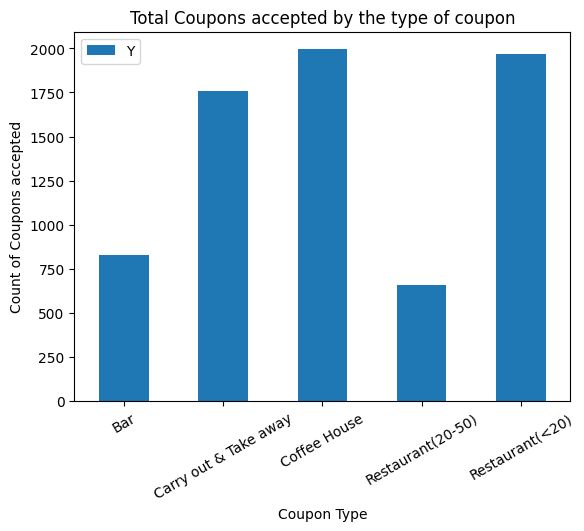

In [11]:

data.groupby('coupon').sum().plot(y='Y', kind='bar')
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Total Coupons accepted by the type of coupon")
plt.xlabel("Coupon Type")
plt.ylabel("Count of Coupons accepted")

6. Use a histogram to visualize the temperature column.

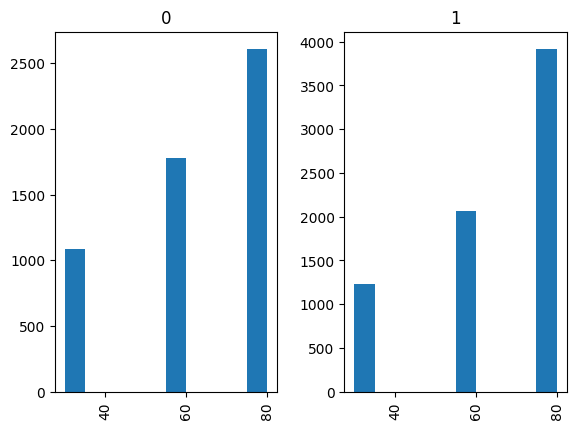

In [12]:
data.hist(column='temperature', by='Y')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
bar_df = data.loc[data['coupon']=='Bar']
bar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   int64 
 2   weather               2017 non-null   int64 
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   int64 
 8   age                   2017 non-null   int64 
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   int64 
 12  occupation            2017 non-null   int64 
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null  

2. What proportion of bar coupons were accepted?


In [14]:
acceptance_bar_df = bar_df.value_counts('Y')
pct_acceptance = round(100* acceptance_bar_df[1]/len(bar_df),2)
print(f"The proportion of bar coupons that were accepted is {pct_acceptance}%")


The proportion of bar coupons that were accepted is 41.0%


In [15]:
bar_df.value_counts('Bar')

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:

temp_bar_df = bar_df.loc[bar_df['Bar'].isin(["Bar never","less1","1~3"])]

acceptance_bar_df = temp_bar_df.value_counts('Y')
#print(acceptance_bar_df)
#print(len(temp_bar_df))
pct_acceptance = round(100* (acceptance_bar_df[1]/len(temp_bar_df)),2)
print(f"The acceptance rate of coupon by those who went to a bar 3 or fewer times a month is {pct_acceptance}%")

temp_bar_df = bar_df.loc[bar_df['Bar'].isin(["4~8","gt8"])]

acceptance_bar_df = temp_bar_df.value_counts('Y')
#print(acceptance_bar_df)
pct_acceptance = round(100* acceptance_bar_df[1]/len(temp_bar_df),2)
print(f"The acceptance rate of coupon by those who went to bar 4 or greater a month is {pct_acceptance}%")


The acceptance rate of coupon by those who went to a bar 3 or fewer times a month is 52.74%
The acceptance rate of coupon by those who went to bar 4 or greater a month is 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
temp_bar_df = bar_df.loc[(bar_df['Bar'].isin(["1~3","4~8","gt8"])) & (bar_df['age'] > 25)]

acceptance_bar_df = temp_bar_df.value_counts('Y')
print(acceptance_bar_df)
print(len(temp_bar_df))
pct_acceptance = round(100* (acceptance_bar_df[1]/len(temp_bar_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a bar more than once a month and are over the age of 25 is {pct_acceptance}%")

temp_bar_df = bar_df.loc[(bar_df['Bar'].isin(["Bar never","less1"])) & (bar_df['age'] <= 25)]

acceptance_bar_df = temp_bar_df.value_counts('Y')
print(acceptance_bar_df)
print(len(temp_bar_df))
pct_acceptance = round(100* (acceptance_bar_df[1]/len(temp_bar_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a bar once a month or less and equal to 25 or under is {pct_acceptance}%")


Y
1    292
0    128
dtype: int64
420
The acceptance rate of coupon between drivers who go to a bar more than once a month and are over the age of 25 is 69.52%
Y
1    70
0    50
dtype: int64
120
The acceptance rate of coupon between drivers who go to a bar once a month or less and equal to 25 or under is 58.33%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [18]:
temp_bar_df = bar_df.loc[(bar_df['Bar'].isin(["1~3","4~8","gt8"])) & \
                         (bar_df['passanger'].isin([2,3])) & (bar_df['passanger'].isin([2,3])) \
                         & (~bar_df['occupation'].isin([1,25]))]

acceptance_bar_df = temp_bar_df.value_counts('Y')
print(acceptance_bar_df)
print(len(temp_bar_df))
pct_acceptance = round(100* (acceptance_bar_df[1]/len(temp_bar_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a bar more than once a month and \n \
had passengers that were not a kid and had occupations other than farming, fishing or forestry is {pct_acceptance}%"
        )

Y
1    120
0     50
dtype: int64
170
The acceptance rate of coupon between drivers who go to a bar more than once a month and 
 had passengers that were not a kid and had occupations other than farming, fishing or forestry is 70.59%


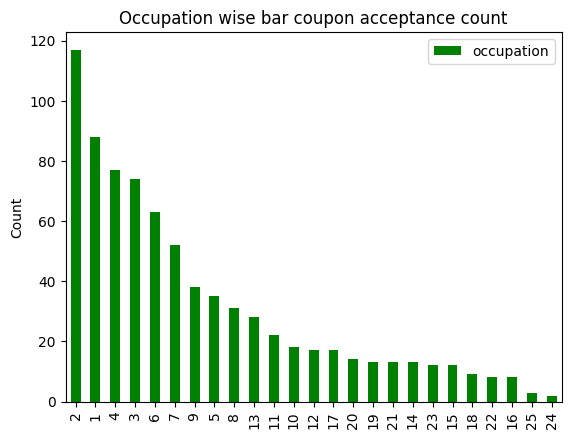

In [40]:
#Occupation wise bar coupon acceptance count with out any kids passanger
bar_df.query('Y==1 and passanger !=4')['occupation'].value_counts().plot(kind='bar',rot=90, color ='green',legend= True)
plt.title('Occupation wise bar coupon acceptance count')
plt.ylabel('Count')
plt.show()


Occupation mapping
convertoccupation = {
  r'Unemployed.*': '1',
  r'Student.*': '2',
  r'Computer.*': '3',
  r'Sales.*': '4',
  r'Education.*' : '5',
  r'Management.*': '6',
  r'Office.*': '7',
  r'Arts.*': '8',
  r'Business.*': '9',
  r'Retired.*' : '10',
  r'Food.*': '11',
  r'Healthcare Practitioners.*': '12',
  r'Healthcare Support.*': '13',
  r'Community.*': '14',
  r'Legal.*' : '15',
  r'Transportation.*': '16',
  r'Architecture.*': '17',
  r'Personal.*': '18',
  r'Protective.*': '19',
  r'Life.*' : '20',
  r'Construction.*': '21',
  r'Installation.*': '22',
  r'Production.*': '23',
  r'Building.*': '24',
  r'Farming.*' : '25'

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [19]:
temp_bar_df = bar_df.loc[(bar_df['Bar'].isin(["1~3","4~8","gt8"])) & (bar_df['passanger'].isin([2,3])) & (~bar_df['maritalStatus'].isin(["Widowed"])) ]

acceptance_bar_df = temp_bar_df.value_counts('Y')
print(acceptance_bar_df)
print(len(temp_bar_df))
pct_acceptance = round(100* (acceptance_bar_df[1]/len(temp_bar_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a bar more than once a month, \n \
had passengers that were not a kid and were not widowed is {pct_acceptance}%"
        )


temp_bar_df = bar_df.loc[(bar_df['Bar'].isin(["1~3","4~8","gt8"])) & \
                          (bar_df['age'] < 30) ]

acceptance_bar_df = temp_bar_df.value_counts('Y')
print(acceptance_bar_df)
print(len(temp_bar_df))
pct_acceptance = round(100* (acceptance_bar_df[1]/len(temp_bar_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a bar more than once a month, \n \
and are under the age of 30 is {pct_acceptance}%"
        )


temp_cheaprestaurant_df = data.loc[(data['RestaurantLessThan20'].isin(["4~8", "gt8"])) & \
                         (data['income'].isin(["$25000 - $374999","$37500 - $49999"]))  ]

acceptance_cheaprestaurant_df = temp_cheaprestaurant_df.value_counts('Y')
print(acceptance_cheaprestaurant_df)
print(len(temp_cheaprestaurant_df))
pct_acceptance = round(100* (acceptance_cheaprestaurant_df[1]/len(temp_cheaprestaurant_df)),2)
print(f"The acceptance rate of coupon between drivers who go to cheap restaurants more than 4 times a month  \n \
and income is less than 50K is {pct_acceptance}%"
        )



Y
1    140
0     55
dtype: int64
195
The acceptance rate of coupon between drivers who go to a bar more than once a month, 
 had passengers that were not a kid and were not widowed is 71.79%
Y
1    249
0     96
dtype: int64
345
The acceptance rate of coupon between drivers who go to a bar more than once a month, 
 and are under the age of 30 is 72.17%
Y
1    414
0    244
dtype: int64
658
The acceptance rate of coupon between drivers who go to cheap restaurants more than 4 times a month  
 and income is less than 50K is 62.92%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# The best demographic to target will be those who visit bar more than once a month and under the age group of 30. The acceptance rate for this category is 72.17%. Alternatively targeting drivers who go to bar 4 or more times per month will also yield the maximum chances of coupon being accepted.

# The acceptance rate of bar coupons is relatively lesser compared to other categories. For instance we see higher acceptance rate for carry out , coffee house and cheap restaurants viz. 73.55%, 49.94% and 70.71% respectively. Even for fine dining restaurants the acceptance rate is at 44.13%, higher compared to acceptance of bar coupon which is at 41%

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new Data Frame that contains only the Coffee House coupons

In [20]:
coffee_df = data.loc[data['coupon']=='Coffee House']
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   int64 
 2   weather               3996 non-null   int64 
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   int64 
 8   age                   3996 non-null   int64 
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   int64 
 12  occupation            3996 non-null   int64 
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null  

1. What proportion of users accept "coffee house" coupons

In [21]:
acceptance_coffee_df = coffee_df.value_counts('Y')
pct_acceptance = round(100* acceptance_coffee_df[1]/len(coffee_df),2)
print(f"The proportion of coffee coupons that were accepted is {pct_acceptance}%")


The proportion of coffee coupons that were accepted is 49.92%


In [22]:
coffee_df.loc[coffee_df['Y']==1].value_counts('CoffeeHouse')

CoffeeHouse
1~3      675
less1    518
4~8      369
gt8      225
never    175
dtype: int64

2. Compare the acceptance rate between those who went to a cofee 3 or fewer times a month to those who went more.

In [28]:
temp_coffee_df = coffee_df.loc[coffee_df['CoffeeHouse'].isin(["never","less1","1~3"])]
pct_acceptance = round(100* (acceptance_coffee_df[1]/len(temp_coffee_df)),2)
print(f"The acceptance rate of coupon by those who went to a Coffee House 3 or fewer times a month is {pct_acceptance}%")

temp_coffee_df = coffee_df.loc[coffee_df['CoffeeHouse'].isin(["4~8","gt8"])]
acceptance_coffee_df = temp_coffee_df.value_counts('Y')

pct_acceptance = round(100* acceptance_coffee_df[1]/len(temp_coffee_df),2)
print(f"The acceptance rate of coupon by those who went to Coffee House 4 or greater a month is {pct_acceptance}%")


The acceptance rate of coupon by those who went to a Coffee House 3 or fewer times a month is 44.94%
The acceptance rate of coupon by those who went to Coffee House 4 or greater a month is 67.5%


3. Compare the acceptance rate between drivers who go to a Coffee House more than once a month and are over the age of 25 to the all others. Is there a difference?

In [31]:
temp_coffee_df = coffee_df.loc[(coffee_df['CoffeeHouse'].isin(["1~3","4~8","gt8"])) & (coffee_df['age'] > 25)]

acceptance_coffee_df = temp_coffee_df.value_counts('Y')
print(acceptance_coffee_df)
print(len(temp_coffee_df))
pct_acceptance = round(100* (acceptance_coffee_df[1]/len(temp_coffee_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a coffee more than once a month and are over the age of 25 is {pct_acceptance}%")

temp_coffee_df = coffee_df.loc[(coffee_df['CoffeeHouse'].isin(["never","less1"])) & (coffee_df['age'] <= 25)]

acceptance_coffee_df = temp_coffee_df.value_counts('Y')
print(acceptance_coffee_df)
print(len(temp_coffee_df))
pct_acceptance = round(100* (acceptance_coffee_df[1]/len(temp_coffee_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a coffee once a month or less and equal to 25 or under is {pct_acceptance}%")

Y
1    867
0    491
dtype: int64
1358
The acceptance rate of coupon between drivers who go to a coffee more than once a month and are over the age of 25 is 63.84%
Y
0    304
1    166
dtype: int64
470
The acceptance rate of coupon between drivers who go to a coffee once a month or less and equal to 25 or under is 35.32%


1.0

Compare acceptance are of coupon  among those who travel alone or with friends

In [36]:
temp_coffee_df = coffee_df.loc[(coffee_df['passanger'].isin([1,2]))]

acceptance_coffee_df = temp_coffee_df.value_counts('Y')
print(acceptance_coffee_df)
print(len(temp_coffee_df))
pct_acceptance = round(100* (acceptance_coffee_df[1]/len(temp_coffee_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a coffee House alone or with friends is {pct_acceptance}%")



Y
0    1763
1    1721
dtype: int64
3484
The acceptance rate of coupon between drivers who go to a coffee House alone or with friends is 49.4%


Compare acceptance rate when the weather is Sunny

In [39]:
temp_coffee_df = coffee_df.loc[(coffee_df['weather'].isin([1]))]

acceptance_coffee_df = temp_coffee_df.value_counts('Y')
print(acceptance_coffee_df)
print(len(temp_coffee_df))
pct_acceptance = round(100* (acceptance_coffee_df[1]/len(temp_coffee_df)),2)
print(f"The acceptance rate of coupon between drivers who go to a coffee House when the weather is Sunny is {pct_acceptance}%")


Y
1    1746
0    1721
dtype: int64
3467
The acceptance rate of coupon between drivers who go to a coffee House when the weather is Sunny is 50.36%


Inference for Coffee House acceptance


1. acceptance of coupon is high among those who have been to the coffee house less than 3 times a month
2. acceptance of coupon is high among those who travel alone or with friends
3. Acceptance rate is high if weather is Sunny
4. acceptance rate is high if people travel to no urgent place or to work

